In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics

In [184]:
df = pd.read_csv(f'./data/finalMergedSet.csv')
df

,date,visitor,home,visitor_points,home_points
0,2015-10-02,Denver Nuggets,LA Clippers,96.0,103.0
1,2015-10-03,New Orleans Pelicans,Indiana Pacers,110.0,105.0
2,2015-10-03,Charlotte Hornets,Orlando Magic,106.0,100.0
3,2015-10-04,Charlotte Hornets,Miami Heat,90.0,77.0
4,2015-10-04,LA Clippers,Toronto Raptors,73.0,93.0
...,...,...,...,...,...
12792,2024-11-04,Philadelphia 76ers,Phoenix Suns,116.0,118.0
12793,2024-11-04,Indiana Pacers,Dallas Mavericks,134.0,127.0
12794,2024-11-04,Sacramento Kings,Miami Heat,111.0,110.0
12795,2024-11-04,Los Angeles Lakers,Detroit Pistons,103.0,115.0


In [185]:
# Take games between 2019 and current year
start_year = 2019
current_year = dt.datetime.now().year

# Convert to datetime data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtered the dataframe for games between start year and current year
filtered_df = df[(df['date'].dt.year >= start_year) & (df['date'].dt.year <= current_year)]

# Reset data frame
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,date,visitor,home,visitor_points,home_points
0,2019-01-01,Portland Trail Blazers,Sacramento Kings,113.0,108.0
1,2019-01-01,Philadelphia 76ers,LA Clippers,119.0,113.0
2,2019-01-01,Utah Jazz,Toronto Raptors,116.0,122.0
3,2019-01-01,New York Knicks,Denver Nuggets,108.0,115.0
4,2019-01-01,Detroit Pistons,Milwaukee Bucks,98.0,121.0
...,...,...,...,...,...
7807,2024-11-04,Philadelphia 76ers,Phoenix Suns,116.0,118.0
7808,2024-11-04,Indiana Pacers,Dallas Mavericks,134.0,127.0
7809,2024-11-04,Sacramento Kings,Miami Heat,111.0,110.0
7810,2024-11-04,Los Angeles Lakers,Detroit Pistons,103.0,115.0


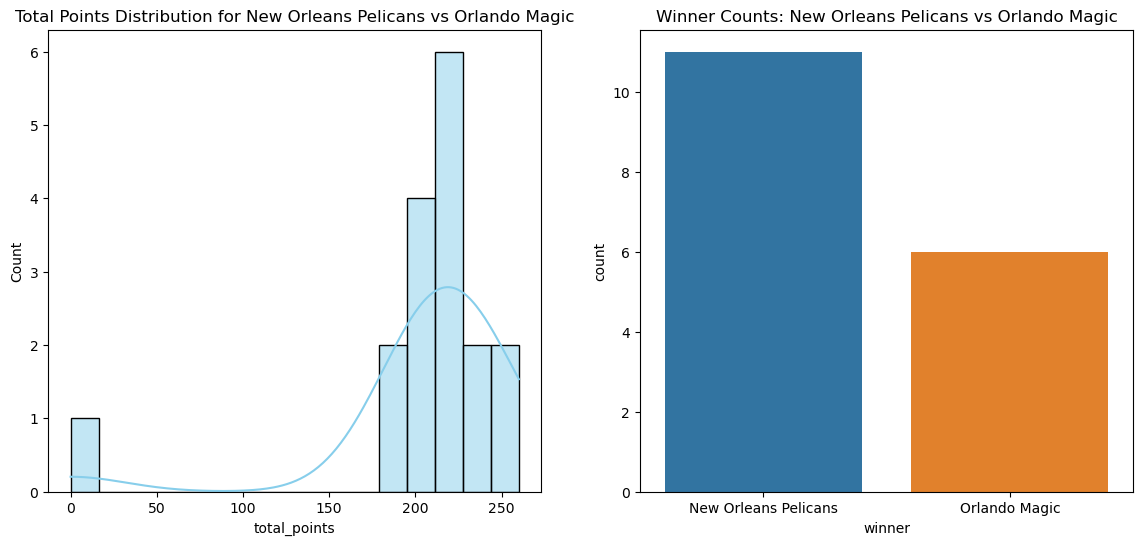

Statistics of New Orleans Pelicans vs Orlando Magic


Mean: 206.8235294117647
Standard Deviation: 56.48034535805093
------------------------------------
z-score for 206.0: -0.01
z-score for 207.0: 0.00
z-score for 208.0: 0.02
z-score for 209.0: 0.04
z-score for 210.0: 0.06
z-score for 211.0: 0.07
z-score for 212.0: 0.09
z-score for 213.0: 0.11
z-score for 214.0: 0.13
z-score for 215.0: 0.14
z-score for 216.0: 0.16
z-score for 217.0: 0.18
z-score for 218.0: 0.20
z-score for 219.0: 0.22
z-score for 220.0: 0.23


,date,visitor,home,visitor_points,home_points,total_points,winner
0,2019-02-12,Orlando Magic,New Orleans Pelicans,118.0,88.0,206.0,New Orleans Pelicans
1,2019-03-20,New Orleans Pelicans,Orlando Magic,96.0,119.0,215.0,Orlando Magic
2,2019-12-15,Orlando Magic,New Orleans Pelicans,130.0,119.0,249.0,New Orleans Pelicans
3,2020-08-13,New Orleans Pelicans,Orlando Magic,127.0,133.0,260.0,Orlando Magic
4,2021-04-01,Orlando Magic,New Orleans Pelicans,115.0,110.0,225.0,New Orleans Pelicans
5,2021-04-22,New Orleans Pelicans,Orlando Magic,135.0,100.0,235.0,New Orleans Pelicans
6,2021-10-06,Orlando Magic,New Orleans Pelicans,86.0,104.0,190.0,Orlando Magic
7,2021-12-23,New Orleans Pelicans,Orlando Magic,110.0,104.0,214.0,New Orleans Pelicans
8,2022-03-09,Orlando Magic,New Orleans Pelicans,108.0,102.0,210.0,New Orleans Pelicans
9,2023-01-20,New Orleans Pelicans,Orlando Magic,110.0,123.0,233.0,Orlando Magic


In [ ]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[
        ((dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)) | 
        ((dataframe['visitor'] == home_team) & (dataframe['home'] == away_team))
        ].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Sort by date
    matchup_game = matchup_game.sort_values(by='date').reset_index(drop=True)
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
    
    # Games with zero points are considered to be postponed
    # Find rows where total_points are not zero
    matchup_game = matchup_game.loc[matchup_game['total_points'] != 0]
        
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], hue='winner')
    axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(-7, 8)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('\n')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')

    # print('------------------------------------')

    # Find percentage of games between specified range
    # total_games = len(matchup_game)
    # games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    # percentage = (len(games_in_range) / total_games) * 100
    # print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
    # print('------------------------------------')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(filtered_df, away_team, home_team, first_line)

In [187]:
teams = df['visitor'].unique()
teams.sort()
teams

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

In [195]:
# Filter the dataframe for the specific matchup
matchup_game = filtered_df.loc[
    ((filtered_df['visitor'] == away_team) & (filtered_df['home'] == home_team)) | 
    ((filtered_df['visitor'] == home_team) & (filtered_df['home'] == away_team))
    ].copy()

# Add a 'total_points' column 
matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']

# Sort by date
matchup_game = matchup_game.sort_values(by='date').reset_index(drop=True)

# Determine the winner
matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)

# Games with zero points are considered to be postponed
# Find rows where total_points are not zero
matchup_game = matchup_game.loc[matchup_game['total_points'] != 0]

# # Create side-by-side plots
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
# # Plot total points distribution with a KDE
# sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
# axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')

# # Plot the winner count    
# sns.countplot(data=matchup_game, x='winner', ax=axes[1], hue='winner')
# axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
    
# # Display the plots
# plt.show()

#     # Calculate a z-score from a provided mean and standard deviation
# mean = matchup_game['total_points'].mean()
# standard_deviation = matchup_game['total_points'].std()

# # Create array of UNDER/OVER values starting with given first line
# under_over_lines = [first_line + i for i in range(-7, 8)]

# # Display basic statics of team matchup
# print(f'Statistics of {away_team} vs {home_team}')
# print('\n')
# print(f'Mean: {mean}')
# print(f'Standard Deviation: {standard_deviation}')

# print('------------------------------------')
# # Display the z-scores for each line score
# for line in under_over_lines:
#     zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
#     print(f'z-score for {line}: {zscore:.2f}')

# print('------------------------------------')

# Find percentage of games between specified range
# total_games = len(matchup_game)
# games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
# percentage = (len(games_in_range) / total_games) * 100
# print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
# print('------------------------------------')